Install scipy, numpy, scikit learn, matplotlib,
Select virtual environment as kernel

Using the Iris flower dataset, introduced in 1936 by Sir Ronald Fisher to show how a statistical method (discriminant analysis) worked.
### To predict the Iris flower species using only two attributes: sepal width and sepal length. 
This is an instance of a classification problem, where we want to assign a label (a value taken from a discrete set) to an item according to its features.

In [1]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris =  datasets.load_iris()

In [3]:
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [4]:
print(X_iris[0], y_iris[0])

[5.1 3.5 1.4 0.2] 0


In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Linear Classification
linear classification models, tries to do: build a line (or, more generally, a
hyperplane in the feature space) that best separates both the target classes, and use
it as a decision boundary (that is, the class membership depends on what side of the
hyperplane the instance is).

#### Building training dataset

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)
# Standardize the features (FEature Scaling)
scaler =  preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(112, 2) (112,)


#### Distributing training instances in two-dimensional space generated by the learning feature

Text(0, 0.5, 'Sepal width')

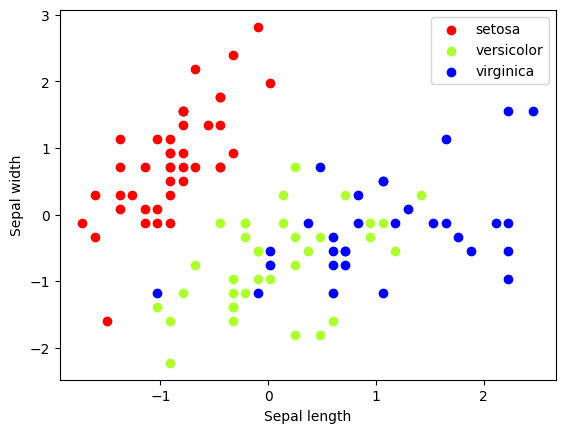

In [7]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


To use any method in scikit-learn, we must first create the corresponding classifier
object, initialize its parameters, and train the model that better fits the training data.

In [8]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [9]:
print(clf.coef_)
print(clf.intercept_)

[[-32.695695    13.53386274]
 [ -0.86747166  -6.27936284]
 [  6.08498337   1.83530581]]
[-17.38197867  -3.36485555  -5.27165876]



The following code draws the three decision boundaries and lets us know if they
worked as expected:

AttributeError: Line2D.set() got an unexpected keyword argument 'hold'

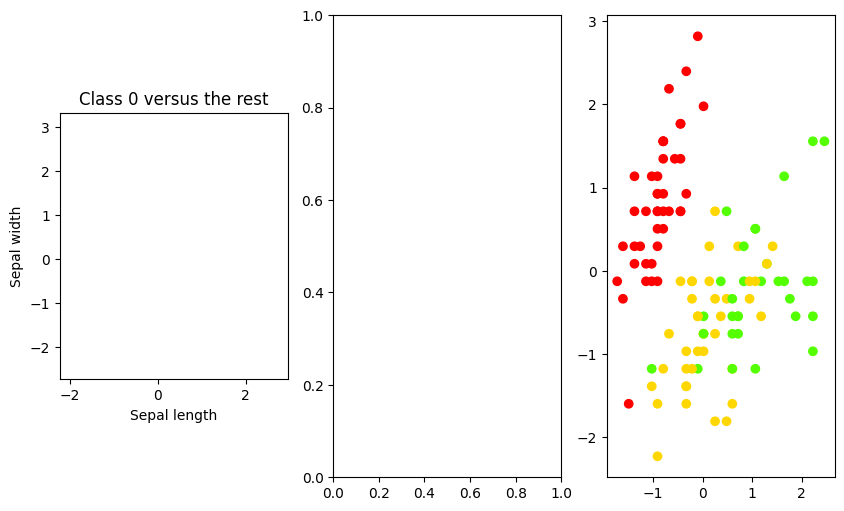

In [10]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    sca = (axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys, hold=True)

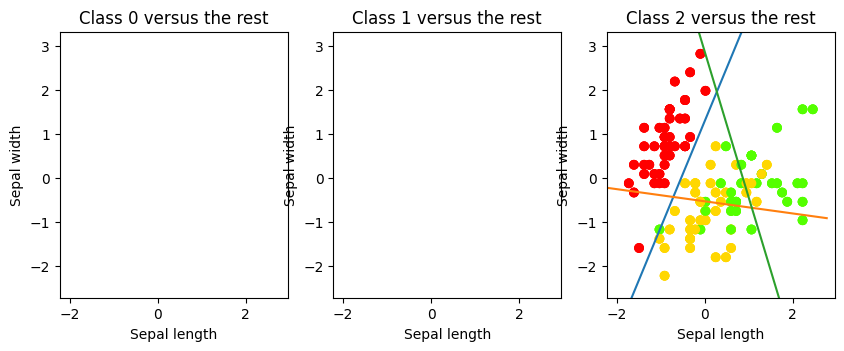

In [11]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    sca = (axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)


In [ ]:
print(clf.predict(scaler.transform([[4.7, 3.1]])))

In [ ]:
print(clf.decision_function(scaler.transform([[4.7, 3.1]])))